 # Q1 
      A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
      

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset
cutlet = pd.read_csv('Cutlets.csv')

In [4]:
cutlet.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
cutlet.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
#checking the null values
cutlet.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
#checking duplicate values
cutlet[cutlet.duplicated()]

,Unit A,Unit B


There are no duplicate values.

In [8]:
cutlet.shape

(35, 2)

# plotting the data

C:\Users\jayes\AppData\Local\Temp\ipykernel_9840\1733330881.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


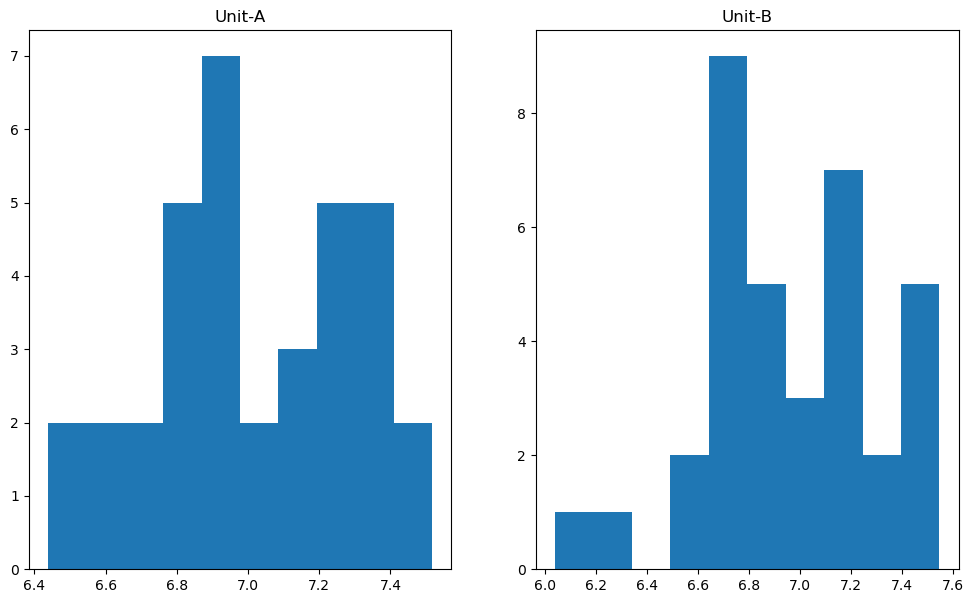

In [9]:
plt.subplots(figsize = (12,7))
plt.subplot(121)
plt.hist(cutlet['Unit A'])
plt.title('Unit-A')
plt.subplot(122)
plt.hist(cutlet['Unit B'])
plt.title('Unit-B')
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_9840\4224255973.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


median of UNIT-A is 6.943800 

median of UNIT-B is 6.939900 


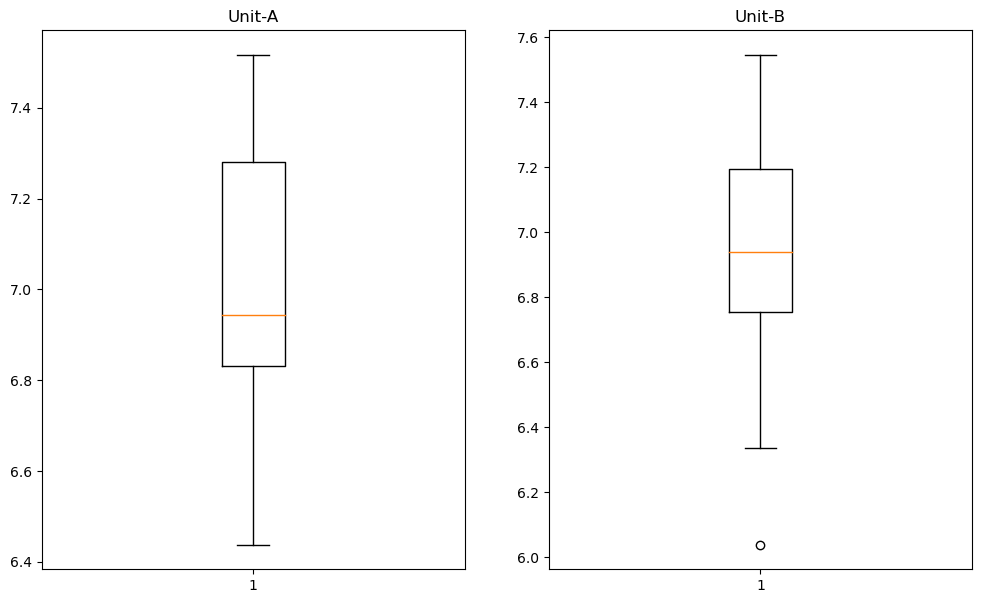

In [10]:
plt.subplots(figsize = (12,7))
plt.subplot(121)
plt.boxplot(cutlet['Unit A'])
print('median of UNIT-A is 6.943800 \n')
plt.title('Unit-A')
plt.subplot(122)
plt.boxplot(cutlet['Unit B'])
print('median of UNIT-B is 6.939900 ')
plt.title('Unit-B')
plt.show()

<Axes: >

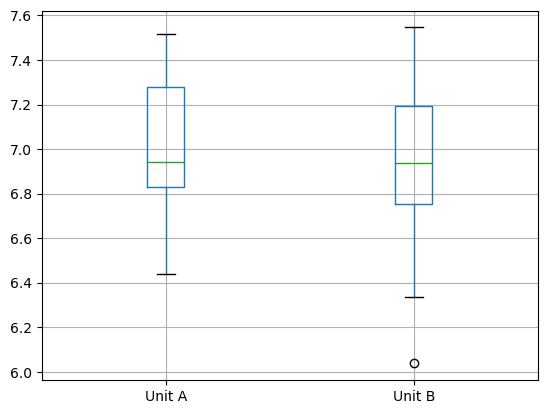

In [11]:
cutlet.boxplot()

In [12]:
UnitA= pd.Series(cutlet.iloc[:,0])
UnitA.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [13]:
UnitB= pd.Series(cutlet.iloc[:,1])
UnitB.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

In [14]:
p_value = stats.ttest_ind(UnitA,UnitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [15]:
p_value[1]

0.4722394724599501

It is a two tail test.

Assume Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units).


Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units) 

as there are 2 Samples, 2 Tail test is applicable.


compare p-value with alpha (Significance level).

if p_value is '=' to aplha we failed to reject null Hypothesis.

if p_value is '≠' to alpha we reject null Hypothesis.

In [16]:
statsctics, p_value = stats.ttest_ind(cutlet["Unit A"], cutlet["Unit B"], alternative='two-sided')
print('p_value is :', p_value)

p_value is : 0.4722394724599501


In [17]:
#as it is two tailed test alpha is 0.5/2
alpha = 0.025
print('significance=%.3f,p-%.3f'%(alpha,p_value))

significance=0.025,p-0.472


In [18]:
if p_value <= alpha:
    print('we reject the null hypothesis as there is a significance difference between Unit A and unit B')
else:
    print(' failed to reject the null hypothesis')

 failed to reject the null hypothesis


# Hence, we fail to reject the null hypothesis as there is no significant difference the two samples.

# Q2
   A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [19]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [20]:
LABTAT = pd.read_csv("labTAT.csv")

In [21]:
LABTAT

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [22]:
LABTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [23]:
LABTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [24]:
LABTAT[LABTAT.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [25]:
LABTAT.info() #checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [26]:
LABTAT.shape

(120, 4)

# plotting the data

array([[<Axes: title={'center': 'Laboratory 1'}>,
        <Axes: title={'center': 'Laboratory 2'}>],
       [<Axes: title={'center': 'Laboratory 3'}>,
        <Axes: title={'center': 'Laboratory 4'}>]], dtype=object)

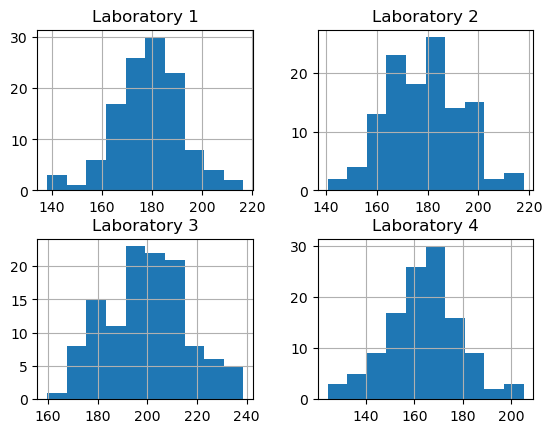

In [27]:
LABTAT.hist()

<Axes: >

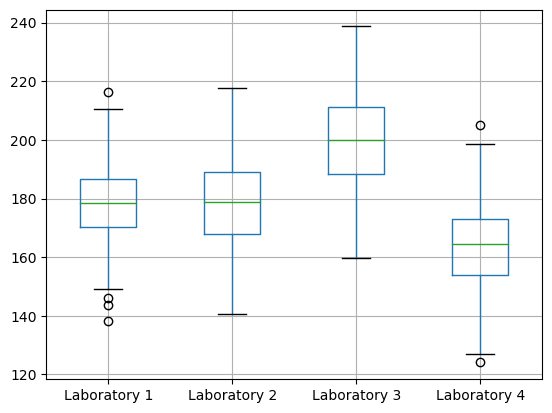

In [28]:
LABTAT.boxplot()

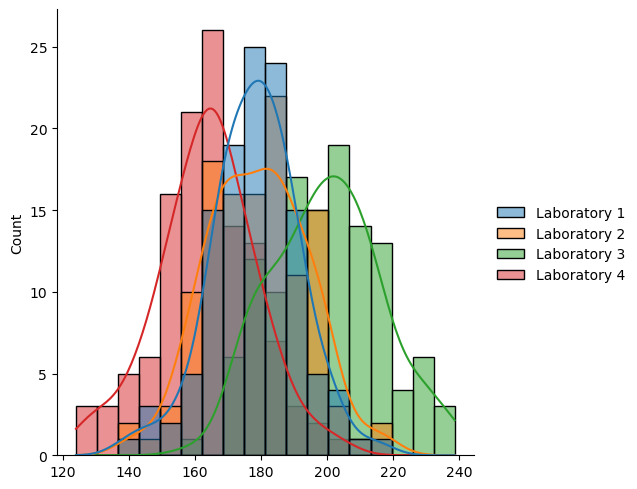

In [29]:
sns.displot(LABTAT, kde=True)


compare p-value with alpha (Significance level).

if p_value is '=' to aplha we failed to reject null Hypothesis.

if p_value is '≠' to alpha we reject null Hypothesis.

In [30]:
test_statistic , p_value = stats.f_oneway(LABTAT.iloc[:,0],LABTAT.iloc[:,1],LABTAT.iloc[:,2],LABTAT.iloc[:,3])
print('p_value :',p_value)

p_value : 2.1156708949992414e-57


In [31]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Hence, We fail to reject Null Hypothesis , there is no significant difference between the samples

# Q3
      Sales of products in four different regions is tabulated for males and females.
      Find if male-female buyer rations are similar across regions.

In [32]:
import scipy.stats as stat
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [33]:
buyer = pd.read_csv("BuyerRatio.csv")

In [34]:
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [35]:
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [36]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p will be (Chi2 stats value, p_value, df, expected obsvations)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

As it is a one-tailed test
alpha = 1-0.95 = 0.05

 Compare p_value with α = 0.05

if p_value is '=' to aplha we failed to reject null Hypothesis.

if p_value is '≠' to alpha we reject null Hypothesis.

In [37]:
p_value1 = 0.6603094907091882

In [38]:
alphaa = 0.05
print('Significnace=%.3f, p=%.3f' % (alphaa, p_value1))

Significnace=0.050, p=0.660


In [39]:

print('Significnace=%.3f, p=%.3f' % (alphaa, p_value1))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.660
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# We fail to reject Null Hypothesis because of lack evidence.Hence the male-female buyer ratios are similar across the regions / All proportions are equal. 

# Q4
     TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

In [40]:
import scipy.stats as stat
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [41]:
centers = pd.read_csv('Costomer+OrderForm.csv')

In [42]:
centers.head

<bound method NDFrame.head of     Phillippines   Indonesia       Malta       India
0     Error Free  Error Free   Defective  Error Free
1     Error Free  Error Free  Error Free   Defective
2     Error Free   Defective   Defective  Error Free
3     Error Free  Error Free  Error Free  Error Free
4     Error Free  Error Free   Defective  Error Free
..           ...         ...         ...         ...
295   Error Free  Error Free  Error Free  Error Free
296   Error Free  Error Free  Error Free  Error Free
297   Error Free  Error Free   Defective  Error Free
298   Error Free  Error Free  Error Free  Error Free
299   Error Free   Defective   Defective  Error Free

[300 rows x 4 columns]>

In [43]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [44]:
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [45]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [46]:
countries = ['Phillippines', 'Indonesia', 'Malta', 'India']

for country in countries:
    print(centers[country].value_counts())


Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [47]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [48]:
# Chi2 contengency independence test
chi2_contingency(contingency_table) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

Make a contingency table

In [49]:
observation=np.array([[271,267,269,280],[29,33,31,20]])
observation

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

Chi2 contengency independence test

In [50]:
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

Compare p_value with alpha (Significane Level)

If p_value is '=' to alpha' we failed to reject Null Hypothesis because of lack of evidence 

If p_value is '≠'' to alpha' we reject Null Hypothesis


In [51]:
p_value2 = 0.2771020991233135

In [52]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value2))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.277
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# We reject Null Hypothesis , there is significant difference between the reports